In [176]:
import pandas as pd
import numpy as np
import torch

In [177]:
# load a pipe-separated CSV into a DataFrame
file_path = "job_history_20251115_144649_completed.csv"  # replace with actual path
df = pd.read_csv(file_path, sep="|", engine="python", encoding="utf-8")
df.head()

,Submit,Start,State,AllocCPUS,ReqMem,AllocTRES,Partition
0,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna
1,2025-11-03T09:31:35,2025-11-03T09:31:35,COMPLETED,5,NaN,"cpu=5,mem=20000M,node=1",NaN
2,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna
3,2025-11-03T09:31:35,2025-11-03T09:31:35,COMPLETED,5,NaN,"cpu=5,mem=20000M,node=1",NaN
4,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna


In [178]:
# drop rows where ReqMem is NaN and reset the index
before = len(df)
df.dropna(subset=['ReqMem'], inplace=True)
df.reset_index(drop=True, inplace=True)
after = len(df)
print(f"Dropped {before - after} rows. New shape: {df.shape}")
df.head()

Dropped 823670 rows. New shape: (738553, 7)


,Submit,Start,State,AllocCPUS,ReqMem,AllocTRES,Partition
0,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna
1,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna
2,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna
3,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna
4,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna


In [179]:
# keep only the unique rows
before = len(df)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
after = len(df)
print(f"Dropped {before - after} duplicate rows. New shape: {df.shape}")
df.head()

Dropped 596321 duplicate rows. New shape: (142232, 7)


,Submit,Start,State,AllocCPUS,ReqMem,AllocTRES,Partition
0,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna
1,2025-09-23T02:11:30,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna
2,2025-10-03T21:19:46,2025-10-15T11:39:54,COMPLETED,96,500000M,"billing=583,cpu=96,mem=500000M,node=1",standard-afton
3,2025-10-03T21:22:00,2025-10-15T11:39:54,COMPLETED,96,500000M,"billing=583,cpu=96,mem=500000M,node=1",standard-afton
4,2025-10-03T21:24:14,2025-10-15T11:39:54,COMPLETED,96,500000M,"billing=583,cpu=96,mem=500000M,node=1",standard-afton


In [180]:
import string

# Concatenate all ReqMem strings and find unique alphabetic characters
all_chars = df['ReqMem'].str.cat()
unique_alphabets = set(c for c in all_chars if c.isalpha())
print("Unique alphabets in ReqMem:", sorted(unique_alphabets))

Unique alphabets in ReqMem: ['G', 'M', 'T']


In [181]:
def convert_mem(mem_str):
    if 'M' in mem_str:
        num = float(mem_str.replace('M', ''))
        return num / 1000  # MB to GB
    elif 'G' in mem_str:
        num = float(mem_str.replace('G', ''))
        return num  # Already GB
    elif 'T' in mem_str:
        num = float(mem_str.replace('T', ''))
        return num * 1000  # TB to GB
    else:
        return float(mem_str)  # Assume GB if no unit

df['ReqMem_GB'] = df['ReqMem'].apply(convert_mem)
df.head()

,Submit,Start,State,AllocCPUS,ReqMem,AllocTRES,Partition,ReqMem_GB
0,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0
1,2025-09-23T02:11:30,2025-11-03T09:31:35,COMPLETED,5,20000M,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0
2,2025-10-03T21:19:46,2025-10-15T11:39:54,COMPLETED,96,500000M,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0
3,2025-10-03T21:22:00,2025-10-15T11:39:54,COMPLETED,96,500000M,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0
4,2025-10-03T21:24:14,2025-10-15T11:39:54,COMPLETED,96,500000M,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0


In [182]:
df.drop(columns=['ReqMem'], inplace=True)

In [183]:
df.head()

,Submit,Start,State,AllocCPUS,AllocTRES,Partition,ReqMem_GB
0,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0
1,2025-09-23T02:11:30,2025-11-03T09:31:35,COMPLETED,5,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0
2,2025-10-03T21:19:46,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0
3,2025-10-03T21:22:00,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0
4,2025-10-03T21:24:14,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0


In [184]:
df['Submit_epoch'] = pd.to_datetime(df['Submit']).astype(int) // 10**9
df['Start_epoch'] = pd.to_datetime(df['Start']).astype(int) // 10**9
df['diff_epochs'] = df['Start_epoch'] - df['Submit_epoch']

In [185]:
df.head()

,Submit,Start,State,AllocCPUS,AllocTRES,Partition,ReqMem_GB,Submit_epoch,Start_epoch,diff_epochs
0,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0,1758593489,1762162295,3568806
1,2025-09-23T02:11:30,2025-11-03T09:31:35,COMPLETED,5,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0,1758593490,1762162295,3568805
2,2025-10-03T21:19:46,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0,1759526386,1760528394,1002008
3,2025-10-03T21:22:00,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0,1759526520,1760528394,1001874
4,2025-10-03T21:24:14,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0,1759526654,1760528394,1001740


In [186]:
# Check for null values in the entire dataframe
total_nulls = df.isnull().sum().sum()
print(f"Total null values in the dataframe: {total_nulls}")

# Check null values per column
nulls_per_column = df.isnull().sum()
print("Null values per column:")
print(nulls_per_column)

Total null values in the dataframe: 0
Null values per column:
Submit          0
Start           0
State           0
AllocCPUS       0
AllocTRES       0
Partition       0
ReqMem_GB       0
Submit_epoch    0
Start_epoch     0
diff_epochs     0
dtype: int64


In [187]:
import re

def extract_gpu(tres_str):
    match = re.search(r'gres/gpu=(\d+)', tres_str)
    return int(match.group(1)) if match else 0

df['GPU_Count'] = df['AllocTRES'].apply(extract_gpu)

In [188]:
df.head()

,Submit,Start,State,AllocCPUS,AllocTRES,Partition,ReqMem_GB,Submit_epoch,Start_epoch,diff_epochs,GPU_Count
0,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0,1758593489,1762162295,3568806,0
1,2025-09-23T02:11:30,2025-11-03T09:31:35,COMPLETED,5,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0,1758593490,1762162295,3568805,0
2,2025-10-03T21:19:46,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0,1759526386,1760528394,1002008,0
3,2025-10-03T21:22:00,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0,1759526520,1760528394,1001874,0
4,2025-10-03T21:24:14,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0,1759526654,1760528394,1001740,0


In [189]:
# list nunique values in GPU_Count and what they are
print("Unique GPU_Count values:", df['GPU_Count'].nunique())
print("GPU_Count value counts:")
print(df['GPU_Count'].value_counts())

Unique GPU_Count values: 9
GPU_Count value counts:
GPU_Count
0     124528
1      17058
2        341
4        205
3         61
6         20
5         10
8          8
16         1
Name: count, dtype: int64


In [190]:
# extract the node count from AllocTRES
def extract_nodes(tres_str):
    match = re.search(r'nodes=(\d+)', tres_str)
    return int(match.group(1)) if match else 1  # default to 1 if not found

df['Node_Count'] = df['AllocTRES'].apply(extract_nodes)

In [191]:
# list unique values in Node_Count and what they are
print("Unique Node_Count values:", df['Node_Count'].nunique())
print("Node_Count value counts:")
print(df['Node_Count'].value_counts())  

Unique Node_Count values: 1
Node_Count value counts:
Node_Count
1    142232
Name: count, dtype: int64


In [192]:
df.head()

,Submit,Start,State,AllocCPUS,AllocTRES,Partition,ReqMem_GB,Submit_epoch,Start_epoch,diff_epochs,GPU_Count,Node_Count
0,2025-09-23T02:11:29,2025-11-03T09:31:35,COMPLETED,5,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0,1758593489,1762162295,3568806,0,1
1,2025-09-23T02:11:30,2025-11-03T09:31:35,COMPLETED,5,"billing=25,cpu=5,mem=20000M,node=1",standard-rivanna,20.0,1758593490,1762162295,3568805,0,1
2,2025-10-03T21:19:46,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0,1759526386,1760528394,1002008,0,1
3,2025-10-03T21:22:00,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0,1759526520,1760528394,1001874,0,1
4,2025-10-03T21:24:14,2025-10-15T11:39:54,COMPLETED,96,"billing=583,cpu=96,mem=500000M,node=1",standard-afton,500.0,1759526654,1760528394,1001740,0,1


In [193]:
# list nunique values in partition and what they are
print("Unique Partition values:", df['Partition'].nunique())
print("Partition value counts:")
print(df['Partition'].value_counts())


Unique Partition values: 20
Partition value counts:
Partition
standard-rivanna             76825
standard-afton               26456
bii                          10467
gpu-a40                       6477
gpu-a100-80                   3812
standard-rivanna-largemem     3773
gpu-a6000                     3673
parallel                      3441
standard-afton-largemem       2983
gpu-v100                      1807
gpu-a100-40                   1118
interactive-rivanna            428
gpu-h200                       321
bii-gpu                        189
dedicated                      160
bii-largemem                   142
gpu-mig                        115
interactive-rtx3090             26
interactive-rtx2080             17
interactive-afton                2
Name: count, dtype: int64


In [194]:
# drop the following columns Submit, Start, AllocTres, Submit_epoch, Start_epoch, Node_Count
df.drop(columns=['Submit', 'Start', 'AllocTRES', 'Submit_epoch', 'Start_epoch', 'Node_Count'], inplace=True)
df.head()

,State,AllocCPUS,Partition,ReqMem_GB,diff_epochs,GPU_Count
0,COMPLETED,5,standard-rivanna,20.0,3568806,0
1,COMPLETED,5,standard-rivanna,20.0,3568805,0
2,COMPLETED,96,standard-afton,500.0,1002008,0
3,COMPLETED,96,standard-afton,500.0,1001874,0
4,COMPLETED,96,standard-afton,500.0,1001740,0


In [195]:
# drop the column State
df.drop(columns=['State'], inplace=True)
df.head()

,AllocCPUS,Partition,ReqMem_GB,diff_epochs,GPU_Count
0,5,standard-rivanna,20.0,3568806,0
1,5,standard-rivanna,20.0,3568805,0
2,96,standard-afton,500.0,1002008,0
3,96,standard-afton,500.0,1001874,0
4,96,standard-afton,500.0,1001740,0


In [196]:
len(df)

142232

In [197]:
df = pd.concat([df, pd.get_dummies(df['Partition'], prefix='Partition')], axis=1)

In [198]:
df.head()

,AllocCPUS,Partition,ReqMem_GB,diff_epochs,GPU_Count,Partition_bii,Partition_bii-gpu,Partition_bii-largemem,Partition_dedicated,Partition_gpu-a100-40,...,Partition_gpu-v100,Partition_interactive-afton,Partition_interactive-rivanna,Partition_interactive-rtx2080,Partition_interactive-rtx3090,Partition_parallel,Partition_standard-afton,Partition_standard-afton-largemem,Partition_standard-rivanna,Partition_standard-rivanna-largemem
0,5,standard-rivanna,20.0,3568806,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,5,standard-rivanna,20.0,3568805,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,96,standard-afton,500.0,1002008,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,96,standard-afton,500.0,1001874,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,96,standard-afton,500.0,1001740,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [199]:
# drop Partition column
df.drop(columns=['Partition'], inplace=True)
df.head()

,AllocCPUS,ReqMem_GB,diff_epochs,GPU_Count,Partition_bii,Partition_bii-gpu,Partition_bii-largemem,Partition_dedicated,Partition_gpu-a100-40,Partition_gpu-a100-80,...,Partition_gpu-v100,Partition_interactive-afton,Partition_interactive-rivanna,Partition_interactive-rtx2080,Partition_interactive-rtx3090,Partition_parallel,Partition_standard-afton,Partition_standard-afton-largemem,Partition_standard-rivanna,Partition_standard-rivanna-largemem
0,5,20.0,3568806,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,5,20.0,3568805,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,96,500.0,1002008,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,96,500.0,1001874,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,96,500.0,1001740,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [200]:
# print average, min, max of diff_epochs
print(f"Average diff_epochs: {df['diff_epochs'].mean()}")
print(f"Min diff_epochs: {df['diff_epochs'].min()}")
print(f"Max diff_epochs: {df['diff_epochs'].max()}")        
print(f"Median diff_epochs: {df['diff_epochs'].median()}")
print(f"Standard Deviation of diff_epochs: {df['diff_epochs'].std()}")

Average diff_epochs: 24345.330678047136
Min diff_epochs: -511
Max diff_epochs: 3568806
Median diff_epochs: 1754.0
Standard Deviation of diff_epochs: 96346.76181937146


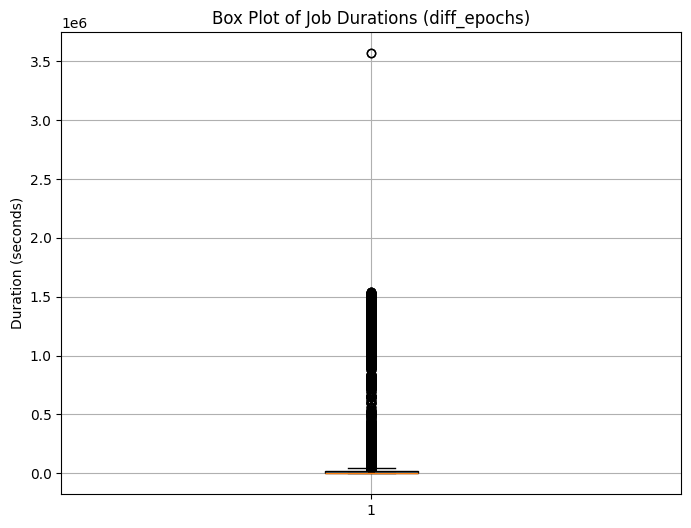

In [201]:
# draw a box plot of diff_epochs
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df['diff_epochs'], vert=True, patch_artist=True)
plt.title('Box Plot of Job Durations (diff_epochs)')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()  

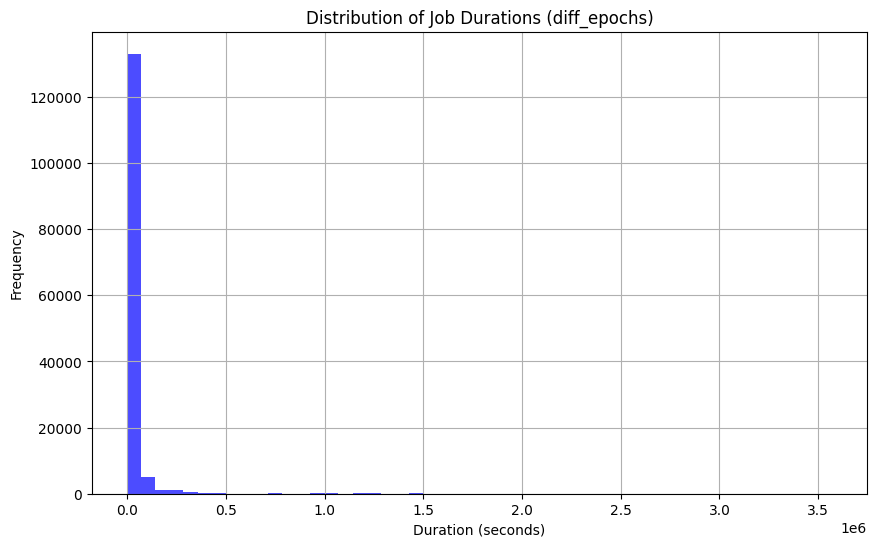

In [202]:
# make a plot of all the diff_epochs values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['diff_epochs'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Job Durations (diff_epochs)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()  

In [203]:
# divide the data frame into input features and target variable and train test split with diff_epochs as target
from sklearn.model_selection import train_test_split
X = df.drop(columns=['diff_epochs'])
y = df['diff_epochs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (113785, 23), y_train shape: (113785,)
X_test shape: (28447, 23), y_test shape: (28447,)


In [204]:
# use a random forest regressor to train on the data and evaluate the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
# and r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Mean Absolute Error: 14092.410839103462
Mean Squared Error: 1698169040.7729175
Root Mean Squared Error: 41208.84663240307
R2 Score: 0.817227045696416


In [205]:
# save the model using pickle
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [206]:
import pickle
import pandas as pd

class JobWaitDurationPredictor:
    def __init__(self, model_path='random_forest_model.pkl'):
        with open(model_path, 'rb') as f:
            self.model = pickle.load(f)
        # Define the partition columns based on the training data
        self.partition_columns = [
            'Partition_bii', 'Partition_bii-gpu', 'Partition_bii-largemem', 'Partition_dedicated',
            'Partition_gpu-a100-40', 'Partition_gpu-a100-80', 'Partition_gpu-a40', 'Partition_gpu-a6000',
            'Partition_gpu-h200', 'Partition_gpu-mig', 'Partition_gpu-v100', 'Partition_interactive-afton',
            'Partition_interactive-rivanna', 'Partition_interactive-rtx2080', 'Partition_interactive-rtx3090',
            'Partition_parallel', 'Partition_standard-afton', 'Partition_standard-afton-largemem',
            'Partition_standard-rivanna', 'Partition_standard-rivanna-largemem'
        ]

    def predict_wait_duration(self, alloc_cpus, req_mem_gb, gpu_count, partition):
        # Create a dictionary for the input features
        input_data = {
            'AllocCPUS': [alloc_cpus],
            'ReqMem_GB': [req_mem_gb],
            'GPU_Count': [gpu_count]
        }
        # Add partition dummies, all False except the matching one
        for col in self.partition_columns:
            input_data[col] = [col == f'Partition_{partition}']
        
        # Create DataFrame
        input_df = pd.DataFrame(input_data)
        
        # Predict
        prediction = self.model.predict(input_df)[0]
        return prediction

In [207]:
# use this class to predict
predictor = JobWaitDurationPredictor()
predicted_duration = predictor.predict_wait_duration(alloc_cpus=16, req_mem_gb=64, gpu_count=0, partition='standard-rivanna')
print(f"Predicted job duration (in seconds): {predicted_duration}")


Predicted job duration (in seconds): 76.69227984189017


In [208]:
# save the dataframe to a new CSV
df.to_csv("processed_job_history.csv", index=False)